In [ ]:
! gdown --id 1cyPBRKhHJODMCvrMbn6p2fz0G5LnyjQk

Downloading...
From: https://drive.google.com/uc?id=1cyPBRKhHJODMCvrMbn6p2fz0G5LnyjQk
To: /content/mp3_mfccs.pickle
100% 531k/531k [00:00<00:00, 3.24MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
import pickle

with open('mp3_mfccs.pickle', 'rb') as handle:
    mp3 = pickle.load(handle)
mp3.keys()

dict_keys(['data', 'target', 'target_names', 'feature_names', 'data_paths'])

In [ ]:
features_df = pd.DataFrame(mp3['data'],  columns = mp3['feature_names'])
features_df

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate,mfccs_0,mfccs_1,mfccs_2,mfccs_3,mfccs_4,mfccs_5,mfccs_6,mfccs_7,mfccs_8,mfccs_9,mfccs_10,mfccs_11,mfccs_12,mfccs_13,mfccs_14,mfccs_15,mfccs_16,mfccs_17,mfccs_18,mfccs_19
0,0.232363,2132.133009,1532.489571,3731.697431,0.097478,0.130573,-250.387039,89.646515,-91.178802,50.069607,-28.212360,-34.305183,-7.950161,-22.208513,-4.083499,5.081441,1.690262,2.378319,7.945852,-17.654047,-11.052958,-5.072163,-9.533834,10.697487,2.291705,11.466321
1,0.213282,2624.733518,2433.593693,5092.231277,0.214787,0.134984,-135.006882,53.321243,-14.403013,24.709724,-3.373373,5.470722,15.017687,5.644182,-15.074151,-9.942076,-2.333773,10.031199,7.041321,-1.048274,-12.877126,-2.939546,0.325550,8.132950,8.272929,-1.621517
2,0.176809,1176.588480,1382.560894,2295.233836,0.075069,0.048519,-323.462341,103.863014,-28.547918,2.336782,-15.711629,-26.558065,-19.175488,-13.545383,-25.065348,-5.336615,-1.205248,-11.806523,-2.758070,-9.673952,-23.239120,-22.414635,-10.796002,-7.055260,3.320124,7.657379
3,0.212348,865.807065,1181.532316,1443.995435,0.040507,0.043348,-363.698975,163.389160,-4.299915,19.220289,7.768054,5.167816,-0.687273,-7.874590,-11.842854,-6.150419,-9.306446,-7.254827,-2.011633,-3.091455,-8.705821,-6.218644,-8.712393,-8.130782,-4.965748,-0.939671
4,0.183405,2087.511205,2038.600576,3920.713792,0.039878,0.087549,-329.440063,72.476448,-30.903608,0.737209,-17.626469,-17.902195,8.126000,3.432436,-15.020200,-0.768321,-3.890921,-2.084789,0.640166,-13.571609,-13.336144,-10.567654,-10.775214,-0.514912,-0.637745,4.761439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,0.183286,1977.989313,1739.022647,3555.928498,0.082667,0.148532,-231.741821,108.667244,-19.590322,8.863906,-13.836814,-0.323934,-1.091595,6.422812,-17.379215,-11.926119,-11.885379,-6.604269,9.109984,2.711586,-9.481259,-12.687554,-6.372543,-3.928871,-16.928770,-2.491690
1182,0.254509,1404.947925,1277.927713,2664.079724,0.088044,0.074725,-237.000076,144.870346,-67.224640,20.541727,-11.390965,-22.120573,-0.059789,-30.073996,-21.944016,-8.009840,-16.322369,1.727730,-3.672981,-6.765654,3.013274,5.636314,2.981302,8.481616,8.918760,7.599905
1183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1131.370850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1184,0.272045,1916.925840,2081.833525,3771.060530,0.122575,0.106381,-146.260574,114.991837,-15.123573,19.524017,0.447318,1.707911,-1.342782,3.035714,-6.760455,-0.148948,-6.741517,-4.262601,-7.079212,0.900651,-2.393778,1.509853,-2.564954,-4.075047,-7.201720,5.086911


In [ ]:
X,y = np.array(features_df),np.array(mp3['target'])

In [32]:
from time import time

def clustering_fit_stats(estimator, name, X,y):
    
    t0 = time()
    lda = LinearDiscriminantAnalysis(n_components=3)
    lda_components = lda.fit(X, y).transform(X)
    y_pred = estimator.fit_predict(lda_components)
    '''pca = PCA(n_components=2)
    pca_components = pca.fit_transform(X)
    y_pred = estimator.fit_predict(pca_components)'''
    
    print('%-9s\t%.3fs\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f  %.3f'
          % (name, (time() - t0),
             metrics.adjusted_rand_score(y, y_pred),
             metrics.adjusted_mutual_info_score(y, y_pred),
             metrics.normalized_mutual_info_score(y, y_pred),
             metrics.homogeneity_score(y, y_pred),
             metrics.completeness_score(y, y_pred),
             metrics.v_measure_score(y,y_pred),
             metrics.silhouette_score(X, y_pred, metric='euclidean'),
             metrics.calinski_harabasz_score(X, y_pred),
             metrics.davies_bouldin_score(X, y_pred)))
    
def contingency_matrix(estimator,name,x,y):
    lda = LinearDiscriminantAnalysis(n_components=3)
    lda_components = lda.fit(X, y).transform(X)
    y_pred = estimator.fit_predict(lda_components)

    '''pca = PCA(n_components=2)
    pca_components = pca.fit_transform(X)
    y_pred = estimator.fit_predict(pca_components)'''
    print('\n')
    print(name)
    print(metrics.cluster.contingency_matrix(y, y_pred))

def clustering_data(estimator,name, X,limit=5):
    print('\n')
    print(name+'\n')
    y_pred = estimator.fit_predict(X)
    clusters = np.unique(y_pred)
    clustering_data = []
    for cluster in clusters:
      row_ix = np.where(y_pred == cluster)[0]
      data_num = min(len(row_ix),limit)
      data = X[row_ix[:data_num],:]
      data = np.column_stack((data,[cluster for i in range(len(data))]))
      clustering_data = clustering_data + data.tolist()

    clustering_df = pd.DataFrame(clustering_data,  columns = list(features_df.columns)+['cluster'])
    display(clustering_df)
    
def clustering_plot(estimator,name, X,y):

    '''pca = PCA(n_components=2)
    pca_components = pca.fit_transform(X)'''

    lda = LinearDiscriminantAnalysis(n_components=3)
    lda_components = lda.fit(X, y).transform(X)

    y_pred = estimator.fit_predict(lda_components)

    clusters = np.unique(y_pred)

    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(projection='3d')

    for cluster in clusters:
        row_ix = np.where(y_pred == cluster)
        ax.scatter(lda_components[row_ix,0],lda_components[row_ix,1],lda_components[row_ix,2], alpha=0.8, label=cluster)
        #plt.scatter(lda_components[row_ix,0],lda_components[row_ix,1],alpha=0.8,label=cluster)
    ax.view_init(elev=30., azim=-60)
    ax.legend(loc="upper left")   
    plt.title(name)
    plt.show()

def plot_labels(X,y):
    lda = LinearDiscriminantAnalysis(n_components=3)
    lda_components = lda.fit(X, y).transform(X)
    targets = np.unique(y)
    for target in targets:
        row_ix = np.where(y == target)
        plt.scatter(lda_components[row_ix,0],lda_components[row_ix,1],alpha=0.8,label=target)
    plt.legend(loc="upper right", ncol=len(targets))   
    plt.title("true lablels")
    plt.show()

*fit_stats

type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
K-means2 	0.352s	0.126	0.302	0.304	0.193	0.715	0.304	0.469	939.086  0.537
K-means3 	0.185s	0.262	0.418	0.420	0.322	0.603	0.420	0.128	468.848  9.652
K-means4 	0.165s	0.410	0.480	0.482	0.423	0.562	0.482	0.103	322.163  21.546
K-means5 	0.221s	0.470	0.505	0.507	0.479	0.539	0.507	0.064	260.698  6.478
K-means6 	0.198s	0.414	0.486	0.489	0.484	0.494	0.489	0.026	250.392  5.750




K-means1
[[183]
 [220]
 [200]
 [194]
 [175]
 [214]]




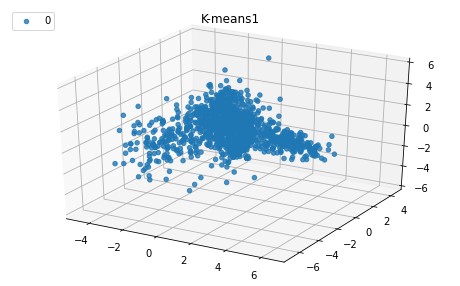



K-means2
[[181   2]
 [ 19 201]
 [195   5]
 [191   3]
 [173   2]
 [205   9]]




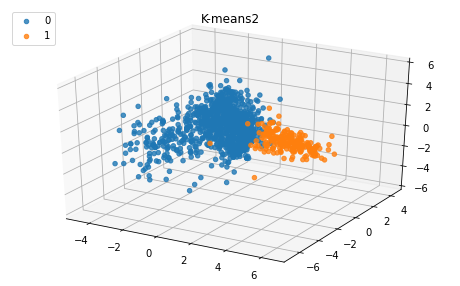



K-means3
[[164  16   3]
 [  3  16 201]
 [ 12 184   4]
 [  8 184   2]
 [  4 169   2]
 [ 70 135   9]]




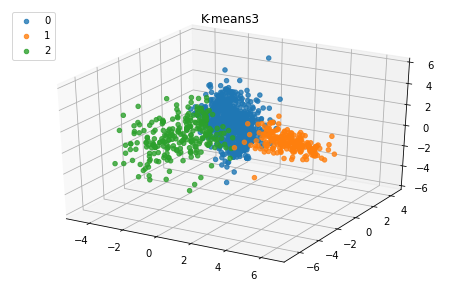



K-means4
[[  4  12   5 162]
 [202  15   2   1]
 [  4  10 178   8]
 [  3 170  16   5]
 [  2  81  88   4]
 [ 11  23 138  42]]




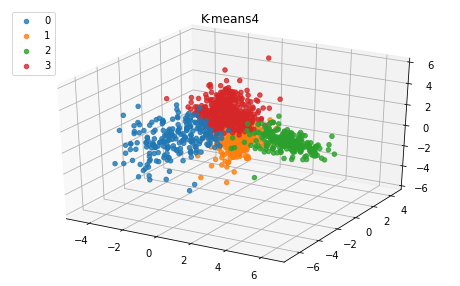



K-means5
[[ 32 142   2   2   5]
 [ 18   0   0 197   5]
 [ 34   7 149   4   6]
 [ 15   3  11   2 163]
 [ 35   2  78   2  58]
 [163  15  23   7   6]]




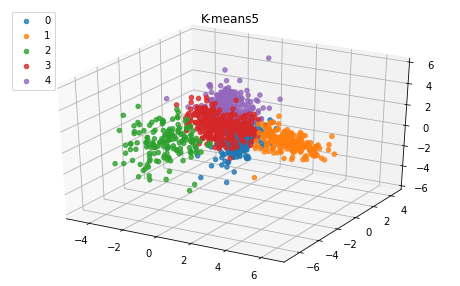



K-means6
[[ 20   2   1   4  46 110]
 [ 23   0 196   0   1   0]
 [ 28 146   3   4  18   1]
 [ 37   7   2 144   2   2]
 [ 79  57   2  32   5   0]
 [ 95  23   5   1  88   2]]




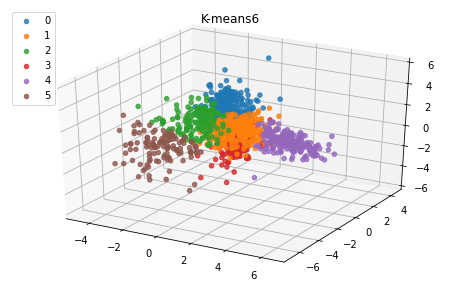

In [33]:
#----------KMEANS---------------#
#fit_stats
print('*fit_stats\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')
for i in range(2,7):
  estimator = KMeans(n_clusters= i)
  clustering_fit_stats(estimator,"K-means"+str(i),X,y)
print('\n')

#contingency_matrix and plot
for i in range(1,7):
  estimator = KMeans(n_clusters= i)
  contingency_matrix(estimator,"K-means"+str(i),X,y)
  print('\n')
  clustering_plot(estimator,"K-means"+str(i), X,y)
print('\n')

*fit_stats

type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
Agglomerative2	0.058s	0.126	0.269	0.271	0.175	0.598	0.271	0.445	947.658  0.620
Agglomerative3	0.104s	0.281	0.397	0.399	0.312	0.553	0.399	0.135	479.014  6.920
Agglomerative4	0.049s	0.381	0.441	0.443	0.388	0.516	0.443	0.096	334.920  5.924
Agglomerative5	0.080s	0.376	0.453	0.456	0.421	0.497	0.456	0.050	273.610  7.409
Agglomerative6	0.052s	0.415	0.471	0.474	0.468	0.480	0.474	0.030	224.394  7.571




Agglomerative1
[[183]
 [220]
 [200]
 [194]
 [175]
 [214]]




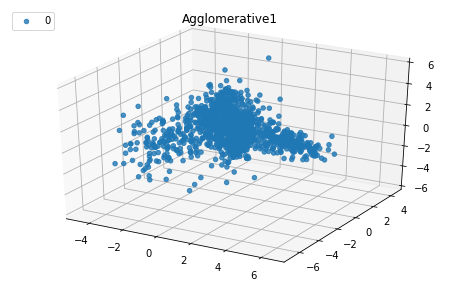



Agglomerative2
[[181   2]
 [ 16 204]
 [186  14]
 [188   6]
 [169   6]
 [189  25]]




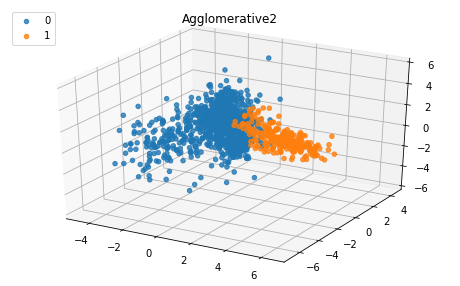



Agglomerative3
[[ 12   2 169]
 [  9 204   7]
 [176  14  10]
 [179   6   9]
 [163   6   6]
 [ 98  25  91]]




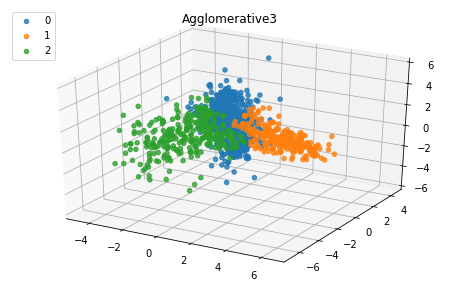



Agglomerative4
[[169   2  10   2]
 [  7 204   9   0]
 [ 10  14  34 142]
 [  9   6 175   4]
 [  6   6 142  21]
 [ 91  25  65  33]]




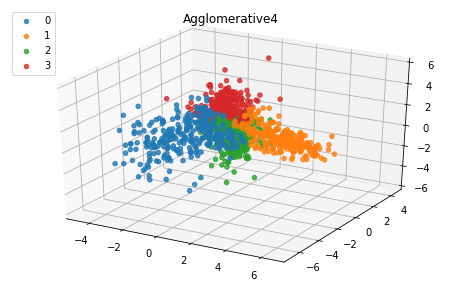



Agglomerative5
[[ 10   2  56   2 113]
 [  9 204   7   0   0]
 [ 34  14  10 142   0]
 [175   6   6   4   3]
 [142   6   6  21   0]
 [ 65  25  87  33   4]]




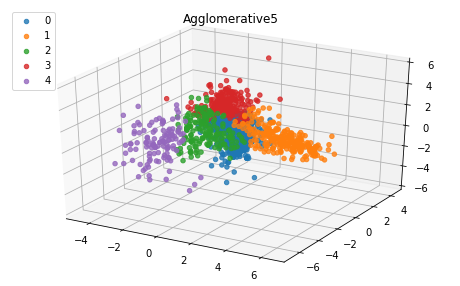



Agglomerative6
[[  2   7  56   2 113   3]
 [204   5   7   0   0   4]
 [ 14  32  10 142   0   2]
 [  6  56   6   4   3 119]
 [  6 133   6  21   0   9]
 [ 25  63  87  33   4   2]]




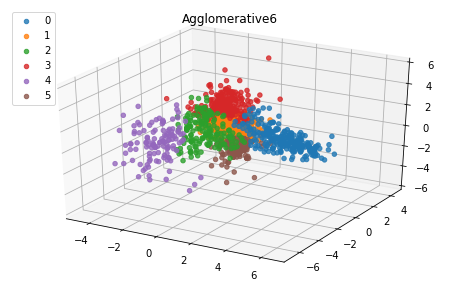

In [34]:
#----------AgglomerativeClustering---------------#
#fit_stats
print('*fit_stats\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')
for i in range(2,7):
  estimator = AgglomerativeClustering(n_clusters=i)
  clustering_fit_stats(estimator,"Agglomerative"+str(i),X,y)
print('\n')

#contingency_matrix and plot
for i in range(1,7):
  estimator = AgglomerativeClustering(n_clusters=i)
  contingency_matrix(estimator,"Agglomerative"+str(i),X,y)
  print('\n')
  clustering_plot(estimator,"Agglomerative"+str(i), X,y)
print('\n')


*fit_stats

type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
GaussianMixture2	0.077s	0.133	0.309	0.311	0.198	0.719	0.311	0.462	944.261  0.559
GaussianMixture3	0.028s	0.265	0.421	0.422	0.324	0.605	0.422	0.128	469.833  8.464
GaussianMixture4	0.069s	0.353	0.445	0.447	0.391	0.522	0.447	0.092	363.160  4.184
GaussianMixture5	0.156s	0.335	0.430	0.433	0.403	0.468	0.433	0.013	330.637  5.611
GaussianMixture6	0.103s	0.293	0.414	0.417	0.403	0.433	0.417	-0.061	261.831  7.146


*contingency_matrix


GaussianMixture1
[[183]
 [220]
 [200]
 [194]
 [175]
 [214]]




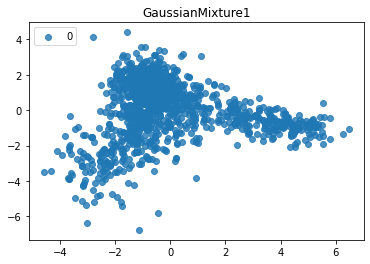



GaussianMixture2
[[181   2]
 [ 14 206]
 [196   4]
 [189   5]
 [172   3]
 [203  11]]




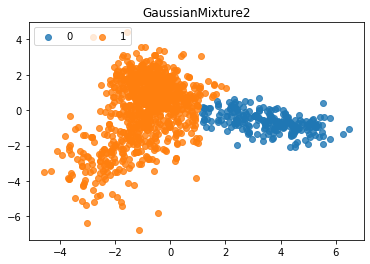



GaussianMixture3
[[164   2  17]
 [  2 203  15]
 [ 15   3 182]
 [  7   3 184]
 [  4   2 169]
 [ 63  10 141]]




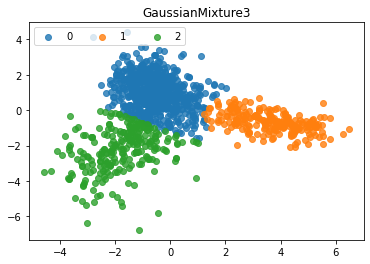



GaussianMixture4
[[ 26 154   1   2]
 [ 20   0   0 200]
 [ 46   9 142   3]
 [ 58   3 131   2]
 [ 45   4 124   2]
 [158  31  18   7]]




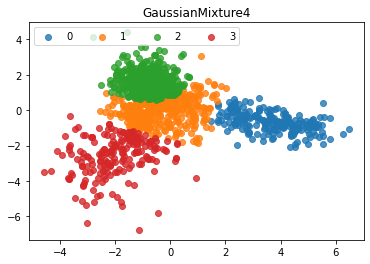



GaussianMixture5
[[ 55 123   2   1   2]
 [  2   0 197   0  21]
 [ 23   2   3 155  17]
 [ 13   0   2 139  40]
 [ 13   0   2 134  26]
 [118   6   7  36  47]]




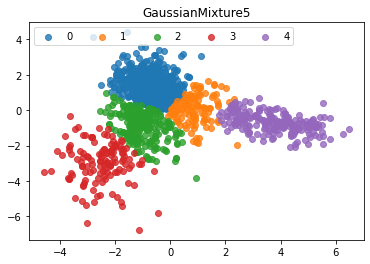



GaussianMixture6
[[  3   0  98   9  73   0]
 [ 47 165   0   5   3   0]
 [  9   1   1  51  16 122]
 [  9   1   0  97  11  76]
 [  4   1   0  74   6  90]
 [ 19   2   3  97  88   5]]




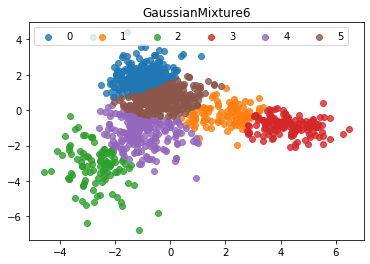

In [ ]:
#----------GaussianMixture---------------#

#fit_stats
print('*fit_stats\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')
for i in range(2,7):
  estimator = GaussianMixture(n_components= i)
  clustering_fit_stats(estimator,"GaussianMixture"+str(i),X,y)
print('\n')

print('*contingency_matrix')
#contingency_matrix
for i in range(1,7):
  estimator = GaussianMixture(n_components= i)
  contingency_matrix(estimator,"GaussianMixture"+str(i),X,y)
  print('\n')
  clustering_plot(estimator,"GaussianMixture"+str(i), X,y)
print('\n')